In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,  r_regression

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons_telemonitoring = fetch_ucirepo(id=189) 
  
# data (as pandas dataframes) 
X = parkinsons_telemonitoring.data.features 
y = parkinsons_telemonitoring.data.targets 
  
# # metadata 
# print(parkinsons_telemonitoring.metadata) 
  
# # variable information 
# print(parkinsons_telemonitoring.variables) 


In [3]:
X.sample(n = 10)

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex
2686,67,130.8300,0.00404,0.000028,0.00195,0.00223,0.00586,0.02303,0.200,0.01141,0.01507,0.02053,0.03423,0.010941,22.539,0.36279,0.77989,0.169950,0
2087,65,33.5090,0.00216,0.000010,0.00092,0.00080,0.00275,0.01448,0.123,0.00552,0.00679,0.00998,0.01655,0.003661,30.953,0.44141,0.56316,0.096727,0
3336,76,6.4035,0.00603,0.000068,0.00266,0.00291,0.00799,0.02550,0.235,0.01184,0.01448,0.02233,0.03552,0.037870,19.072,0.65006,0.59409,0.259940,0
5204,67,28.7620,0.00378,0.000021,0.00184,0.00222,0.00552,0.02589,0.222,0.01191,0.01502,0.02373,0.03573,0.008734,22.986,0.50627,0.62651,0.210530,0
4780,71,48.8880,0.00473,0.000035,0.00226,0.00290,0.00679,0.02254,0.201,0.01169,0.01473,0.01925,0.03508,0.009953,20.955,0.41429,0.75032,0.235060,0
317,57,168.2700,0.00199,0.000013,0.00087,0.00115,0.00261,0.01120,0.109,0.00573,0.00707,0.00952,0.01720,0.004082,29.682,0.40309,0.55386,0.101450,0
651,75,58.5610,0.00450,0.000045,0.00151,0.00277,0.00453,0.06258,0.551,0.03030,0.03889,0.06282,0.09089,0.024861,18.138,0.57407,0.67395,0.274770,0
5174,67,174.7300,0.00533,0.000028,0.00260,0.00286,0.00781,0.03828,0.333,0.02061,0.02215,0.02701,0.06183,0.021458,19.812,0.59874,0.65584,0.201450,0
2637,55,81.7330,0.00976,0.000079,0.00461,0.00459,0.01383,0.03390,0.307,0.01732,0.01955,0.02087,0.05195,0.045426,20.013,0.56215,0.67937,0.312350,0
4560,59,17.5770,0.00474,0.000048,0.00226,0.00202,0.00679,0.01343,0.114,0.00533,0.00665,0.01321,0.01598,0.013352,22.340,0.68939,0.76058,0.191740,0


In [4]:
y.head()

,motor_UPDRS,total_UPDRS
0,28.199,34.398
1,28.447,34.894
2,28.695,35.389
3,28.905,35.810
4,29.187,36.375


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   test_time      5875 non-null   float64
 2   Jitter(%)      5875 non-null   float64
 3   Jitter(Abs)    5875 non-null   float64
 4   Jitter:RAP     5875 non-null   float64
 5   Jitter:PPQ5    5875 non-null   float64
 6   Jitter:DDP     5875 non-null   float64
 7   Shimmer        5875 non-null   float64
 8   Shimmer(dB)    5875 non-null   float64
 9   Shimmer:APQ3   5875 non-null   float64
 10  Shimmer:APQ5   5875 non-null   float64
 11  Shimmer:APQ11  5875 non-null   float64
 12  Shimmer:DDA    5875 non-null   float64
 13  NHR            5875 non-null   float64
 14  HNR            5875 non-null   float64
 15  RPDE           5875 non-null   float64
 16  DFA            5875 non-null   float64
 17  PPE            5875 non-null   float64
 18  sex     

In [5]:
#Checking for duplicates
X.duplicated().sum()

0

In [4]:
X.corr()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex
age,1.000000,0.019884,0.023071,0.035685,0.010255,0.013199,0.010258,0.101554,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790,-0.041602
test_time,0.019884,1.000000,-0.022837,-0.011349,-0.028888,-0.023290,-0.028876,-0.033870,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563,-0.009805
Jitter(%),0.023071,-0.022837,1.000000,0.865574,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849,0.051422
Jitter(Abs),0.035685,-0.011349,0.865574,1.000000,0.844622,0.790534,0.844626,0.649041,0.655866,0.623825,0.621397,0.589992,0.623823,0.699954,-0.706420,0.547097,0.352264,0.787848,-0.154661
Jitter:RAP,0.010255,-0.028888,0.984181,0.844622,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652,0.076718
Jitter:PPQ5,0.013199,-0.023290,0.968214,0.790534,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491,0.087995
Jitter:DDP,0.010258,-0.028876,0.984184,0.844626,1.000000,0.947203,1.000000,0.681734,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660,0.076703
Shimmer,0.101554,-0.033870,0.709791,0.649041,0.681729,0.732747,0.681734,1.000000,0.992334,0.979828,0.984904,0.935457,0.979827,0.795158,-0.801416,0.468235,0.132540,0.615709,0.058736
Shimmer(dB),0.111130,-0.030962,0.716704,0.655866,0.685551,0.734591,0.685556,0.992334,1.000000,0.968015,0.976373,0.936338,0.968014,0.798077,-0.802496,0.472409,0.126111,0.635163,0.056481
Shimmer:APQ3,0.098912,-0.029020,0.664149,0.623825,0.650226,0.676711,0.650228,0.979828,0.968015,1.000000,0.962723,0.885695,1.000000,0.732736,-0.780697,0.436878,0.130735,0.576704,0.044937


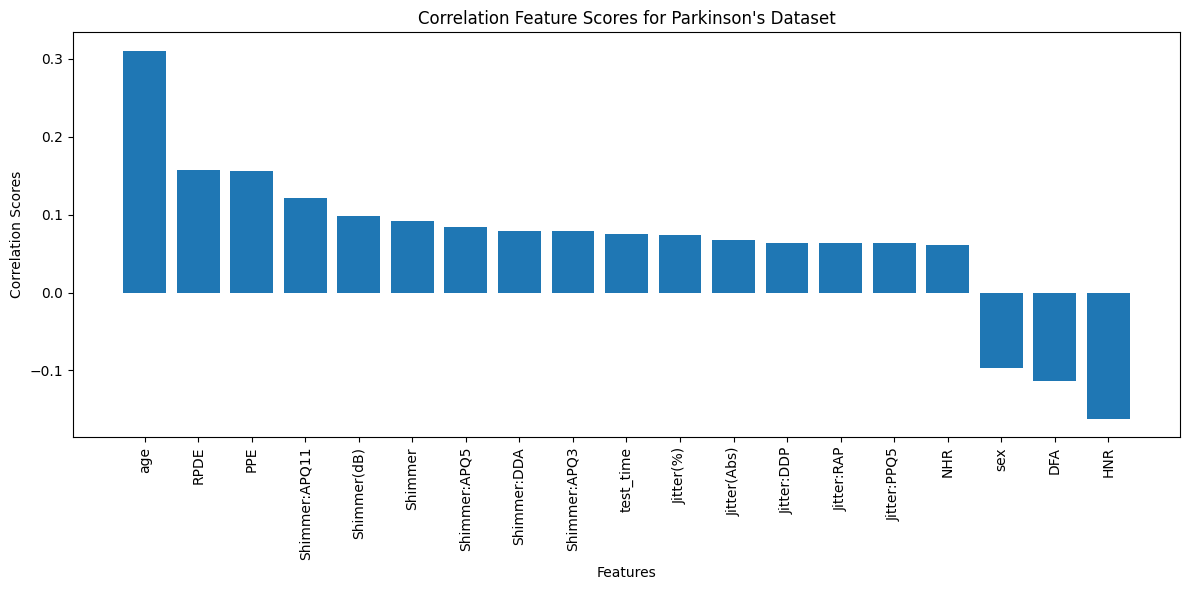

In [10]:
k_best = SelectKBest(score_func=r_regression, k = 5)
#Fit SelectKBest on the dataset
k_best.fit(X,y['total_UPDRS']) 
# Get the indices of the selected features
selected_feature_indices = np.where(k_best.get_support())[0]

# Get the feature names and F-statistic scores
feature_names = X.columns
feature_scores = k_best.scores_

# Create a dataframe to store feature names and F-statistic scores
feature_df = pd.DataFrame({'Feature': feature_names, 'R-Statistic': feature_scores})

# Sort the dataframe by F-statistic scores in descending order
feature_df = feature_df.sort_values(by='R-Statistic', ascending=False)

# Create a bar chart to visualize feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_df)), feature_df['R-Statistic'])
plt.xlabel('Features')
plt.ylabel('Correlation Scores')

plt.title('Correlation Feature Scores for Parkinson\'s Dataset')
plt.xticks(range(len(feature_df)), feature_df['Feature'], rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
feature_df

,Feature,R-Statistic
0,age,0.310290
15,RPDE,0.156897
17,PPE,0.156195
11,Shimmer:APQ11,0.120838
8,Shimmer(dB),0.098790
7,Shimmer,0.092141
10,Shimmer:APQ5,0.083467
12,Shimmer:DDA,0.079363
9,Shimmer:APQ3,0.079363
1,test_time,0.075263


In [16]:
sorted= feature_df.sort_values(by = "R-Statistic")
top_10_features = sorted['Feature'].head(10).tolist()
print(top_10_features)


['HNR', 'DFA', 'sex', 'NHR', 'Jitter:PPQ5', 'Jitter:RAP', 'Jitter:DDP', 'Jitter(Abs)', 'Jitter(%)', 'test_time']


In [21]:
X_featuer_selected = X[top_10_features]
X_featuer_selected.sample(n = 10)

,HNR,DFA,sex,NHR,Jitter:PPQ5,Jitter:RAP,Jitter:DDP,Jitter(Abs),Jitter(%),test_time
3383,15.348,0.59768,0,0.154620,0.00673,0.00958,0.02875,0.000170,0.01632,4.4181
3192,15.502,0.76087,0,0.037026,0.00374,0.00297,0.00890,0.000056,0.00612,110.8400
4276,17.835,0.76870,0,0.022564,0.00388,0.00294,0.00883,0.000060,0.00794,34.3580
2630,16.622,0.71647,0,0.080734,0.00919,0.01009,0.03027,0.000142,0.01966,32.7320
2848,17.269,0.65431,0,0.043761,0.00461,0.00464,0.01391,0.000057,0.00842,25.7560
4530,19.309,0.55277,1,0.023521,0.00165,0.00170,0.00510,0.000014,0.00433,177.4600
5782,23.441,0.61407,0,0.039565,0.00307,0.00344,0.01033,0.000054,0.00598,44.6380
3321,20.837,0.72622,0,0.013382,0.00183,0.00147,0.00442,0.000027,0.00320,102.7900
604,19.892,0.61665,0,0.014957,0.00210,0.00170,0.00510,0.000032,0.00357,77.3690
5874,23.259,0.57077,0,0.008172,0.00166,0.00135,0.00406,0.000021,0.00282,170.7300


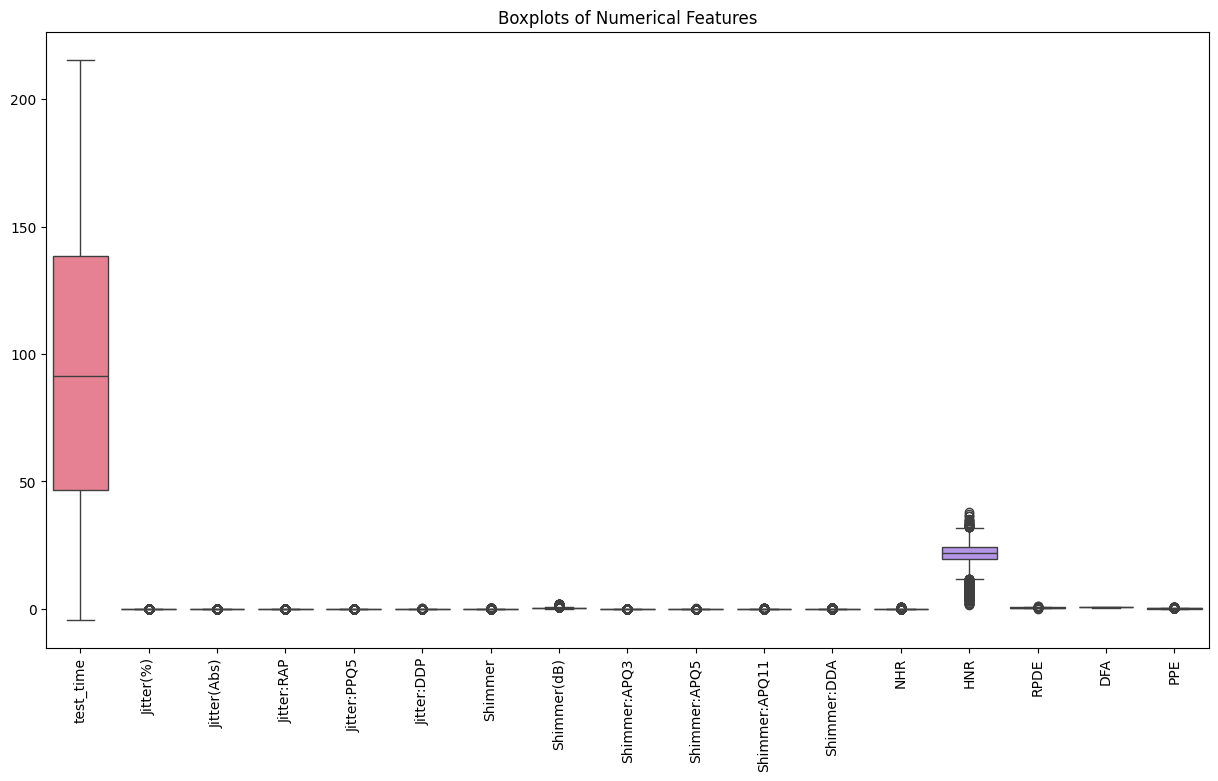

In [20]:
#checking for outliers 
plt.figure(figsize=(15, 8))
sns.boxplot(data=X.select_dtypes(include=['float64']))
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Boxplots of Numerical Features")
plt.show()

In [16]:
numercial_features = X.select_dtypes(include = 'float64').columns
outlier_counts = {}
for feature in numercial_features:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = X[(X[feature] < lower_limit) | (X[feature] > upper_limit)]
      # Store count of outliers
    outlier_counts[feature] = outliers.shape[0]
outlier_counts
    

{'test_time': 0,
 'Jitter(%)': 398,
 'Jitter(Abs)': 366,
 'Jitter:RAP': 414,
 'Jitter:PPQ5': 425,
 'Jitter:DDP': 413,
 'Shimmer': 333,
 'Shimmer(dB)': 332,
 'Shimmer:APQ3': 332,
 'Shimmer:APQ5': 314,
 'Shimmer:APQ11': 314,
 'Shimmer:DDA': 331,
 'NHR': 436,
 'HNR': 171,
 'RPDE': 26,
 'DFA': 0,
 'PPE': 206}

In [17]:
# **Step 1: Capping Outliers** for features with many extreme values
cap_features = ["Jitter(%)", "Jitter(Abs)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP",
                "Shimmer", "Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "Shimmer:APQ11",
                "Shimmer:DDA", "NHR", "PPE"]

for feature in cap_features:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    X[feature] = X[feature].clip(lower=lower_limit, upper=upper_limit)

# **Step 2: Removing Outliers** for features with clear noise/errors
remove_features = ["RPDE", "DFA"]

for feature in remove_features:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    X = X[(X[feature] >= lower_limit) & (X[feature] <= upper_limit)]  # Remove rows

# **Step 3: Applying Log Transformation** for skewed distributions
log_transform_features = ["Jitter(%)", "Jitter:RAP", "Shimmer", "NHR", "PPE"]

for feature in log_transform_features:
    X[feature] = np.log1p(X[feature])  # log(1 + X) to avoid log(0)

# **Final Shape after Outlier Treatment**
print(f"Dataset shape after outlier handling: {X.shape}")


C:\Users\Asus\AppData\Local\Temp\ipykernel_14752\1944497496.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X[feature].clip(lower=lower_limit, upper=upper_limit)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14752\1944497496.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X[feature].clip(lower=lower_limit, upper=upper_limit)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14752\1944497496.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Dataset shape after outlier handling: (5849, 19)


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5874
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5849 non-null   int64  
 1   test_time      5849 non-null   float64
 2   Jitter(%)      5849 non-null   float64
 3   Jitter(Abs)    5849 non-null   float64
 4   Jitter:RAP     5849 non-null   float64
 5   Jitter:PPQ5    5849 non-null   float64
 6   Jitter:DDP     5849 non-null   float64
 7   Shimmer        5849 non-null   float64
 8   Shimmer(dB)    5849 non-null   float64
 9   Shimmer:APQ3   5849 non-null   float64
 10  Shimmer:APQ5   5849 non-null   float64
 11  Shimmer:APQ11  5849 non-null   float64
 12  Shimmer:DDA    5849 non-null   float64
 13  NHR            5849 non-null   float64
 14  HNR            5849 non-null   float64
 15  RPDE           5849 non-null   float64
 16  DFA            5849 non-null   float64
 17  PPE            5849 non-null   float64
 18  sex          

In [ ]:
#Scaling the numerical data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sample 10 random rows from the scaled data
sample_indices = np.random.choice(X_scaled.shape[0], 10, replace=False)
X_scaled_sample = X_scaled[sample_indices]
print(X_scaled_sample.mean())

0.9275033356250574


<Axes: >

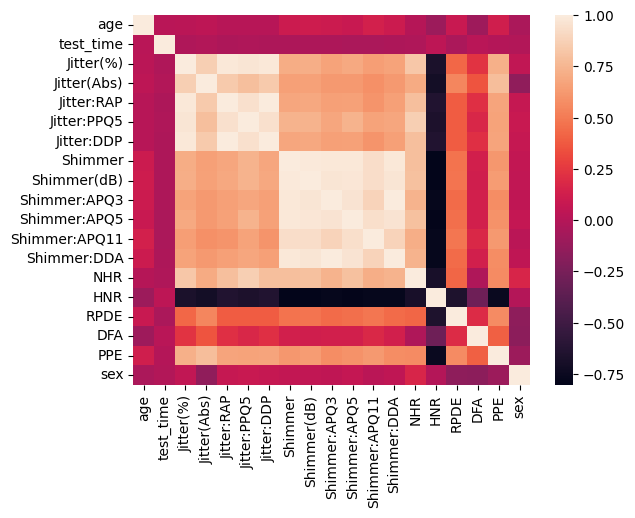

In [6]:
sns.heatmap(X.corr())

In [ ]:
sns.pairplot(X)

KeyboardInterrupt: 

In [15]:
def train_test_split(X, y, test_size = 0.3, random_seed = 42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test   
    

In [17]:
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_seed = 42)